In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname, _, filenames)
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input ['titanic'] []
/kaggle/input/titanic [] ['train.csv', 'test.csv', 'gender_submission.csv']


This Python 3 environment comes with many helpful analytics libraries installed   
이 파이썬3 환경은 많은 도움되는 통계 라이브러리들이 설치되어 제공됩니다(comes)   
It is defined by the kaggle/python Docker image: http://github.com/kaggle/docker-python   
이것은 캐클/파이썬 도커 이미지에 의해 정의됩니다   
For example, here's several helpful packages to load   
예를들어, 여기 몇 가지 도움되는 패키지가 있습니다 로드할 수 있는.   

linear algebra(리니얼 알지브라)   
선형 대수학   
data processing, CSV file I/O   
데이터 처리, csv 파일 입출력   

Input data files are available in the read-only "../input/" directory   
입력 데이터 파일들은 읽기 전용으로 가능합니다. ../input/ 폴더에서   
For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory   
예를들어, 이것을 실행시키면(run을 클릭하거나 shift+enter를 눌러서) 모든 파일을 리스트 할 것이다 입력 폴더 아래의   

You can write up to 20GB to the current directory(/kaggle/working/) that gets preserved as output when you create a version using 'Save & Run All'   
너는 20GB를 쓸 수 있다 현재 폴더에(/kaggle/working/) 보존된다 출력으로써 너가 Save&Run All을 사용해서 버전을 생성할때   
You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session   
너는 또한 쓸수있다 임시 파일을 kaggle/temp에. 그러나 그것들은 현제 세션 밖에서 저장되지 않을 것이다.   

# Introduction(소개)

This notebook is a very basic and simple introductory primer to the method of ensembling (combining) base learning models, in particular the variant of ensembling known as Stacking.
이 노트북은 앙상블(조합) 기본 학습 모델들을 결합하는 방법인 스태킹(Stacking)에 대한 매우 기본적이고 간단한 입문서입니다.

In a nutshell stacking uses as a first-level (base), the predictions of a few basic classifiers and then uses another model at the second-level to predict the output from the earlier first-level predictions.
간단히 말해, 스태킹은 첫 번째 수준(베이스)으로 몇 가지 기본 분류기의 예측 결과를 사용하고, 그 다음 두 번째 수준에서는 이전 첫 번째 수준의 예측 결과로부터 최종 출력을 예측하는 모델을 사용합니다.

The Titanic dataset is a prime candidate for introducing this concept as many newcomers to Kaggle start out here.
타이타닉 데이터셋은 Kaggle 입문자들이 이 개념에 대한 이해를 시작하는 데 적합한 후보입니다.

Furthermore even though stacking has been responsible for many a team winning Kaggle competitions there seems to be a dearth of kernels on this topic so I hope this notebook can fill somewhat of that void.
게다가 스태킹은 많은 팀이 Kaggle 경쟁에서 우승하는 데 기여했음에도 불구하고, 이 주제에 대한 커널이 부족한 것 같습니다. 그래서 이 노트북이 그 부족한 부분을 어느 정도 채워줄 수 있기를 희망합니다.

I myself am quite a newcomer to the Kaggle scene as well and the first proper ensembling/stacking script that I managed to chance upon and study was one written in the AllState Severity Claims competition by the great Faron.
저 또한 Kaggle에서 상대적으로 신규인 입문자입니다. 저가 처음 제대로 접한 앙상블/스태킹 스크립트는 훌륭한 Faron이 AllState Severity Claims 경쟁에서 작성한 것이었습니다.

The material in this notebook borrows heavily from Faron's script although ported to factor in ensembles of classifiers whilst his was ensembles of regressors.
이 노트북의 자료는 크게 Faron의 스크립트를 참고했지만, 분류기의 앙상블을 고려한 내용으로 변형되었습니다.

Anyway please check out his script here: Stacking Starter : by Faron
어쨌든 Faron의 스크립트를 확인해주세요: Stacking Starter : by Faron
https://www.kaggle.com/mmueller/allstate-claims-severity/stacking-starter/run/390867

Now onto the notebook at hand and I hope that it manages to do justice and convey the concept of ensembling in an intuitive and concise manner.
이제 본 노트북에 넘어가서 앙상블 개념을 직관적이고 간결하게 전달할 수 있기를 바랍니다.

My other standalone Kaggle script which implements exactly the same ensembling steps (albeit with different parameters) discussed below gives a Public LB score of 0.808 which is good enough to get to the top 9% and runs just under 4 minutes.
다른 독립형 Kaggle 스크립트는 아래에서 설명하는 앙상블 단계를 정확히 구현하며, 다른 매개변수를 사용하지만 Public LB 점수가 0.808이며 상위 9%에 해당하며 약 4분 이내에 실행됩니다.

Therefore I am pretty sure there is a lot of room to improve and add on to that script.
따라서 해당 스크립트를 개선하고 추가할 여지가 많다고 확신합니다.

Anyways please feel free to leave me any comments with regards to how I can improve.
아무튼 어떻게 개선할 수 있는지에 대한 의견이 있다면 언제든 자유롭게 남겨주세요.

In [53]:
# Load in our libraries
import pandas as pd # 데이터 처리, csv 파일 입출력
import numpy as np # 선형 대수학 연산
import re # 정규식
import sklearn # 머신러닝
import xgboost as xgb # 머신러닝 중 xgboost 알고리즘
import seaborn as sns # 데이터 시각화
import matplotlib.pyplot as plt # 데이터 시각화2
%matplotlib inline

import plotly.offline as py  # plotly의 오프라인 모드(그래프를 노트북 내에서 표시하도록)를 사용하기 위한 모듈을 가져옵니다.
py.init_notebook_mode(connected=True)  # 노트북 모드에서 plotly를 사용하기 위해 초기화(노트북에 인라인으로 표시)합니다.
import plotly.graph_objs as go  # plotly의 그래프 객체를 사용하기 위한 모듈을 가져옵니다.
import plotly.tools as tls  # plotly의 도구 모듈을 가져옵니다.


import warnings # 출력에서 경고를 제거하기 위해 사용
warnings.filterwarnings('ignore')

# 머신러닝의 다양한 앙상블 머신러닝 모델
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC # 머신러닝 알고리즘 중 서포트 벡터 머신
from sklearn.model_selection import KFold # 교차검증


# Feature Exploration, Engineering and Cleaning   (피처 탐색, 엔지니어링 및 정리)   

Now we will proceed much like how most kernels in general are structured   
이제 우리는 일반적으로 대부분의 커널들이 구성되는 방식과 유사하게 진행할 것입니다.   
and that is to first explore the data on hand   
그 첫 번째로는 주어진 데이터를 탐색합니다.   
identify possible feature engineering opportunities   
가능한 feature engineering 기회를 식별합니다.   
as well as numerically encode any categorical features   
그리고 범주형 feature를 수치적으로 인코딩합니다.   

In [54]:
# Load in the train and test datasets
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

# Store our passenger ID for easy access
PassengerId = test['PassengerId']

train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Well it is no surprise that our task is to somehow extract the information out of the categorical variables.   
우리의 작업은 어떤 식으로든 범주형 변수에서 정보를 추출하는 것이기 때문에 이는 놀랄 일이 아닙니다.

### Feature Engineering
피처 엔지니어링

Here, credit must be extended to Sina's very comprehensive and well-thought out notebook for the feature engineering ideas so please check out his work.
여기서는 피처 엔지니어링 아이디어에 대한 매우 포괄적이고 심사숙고한 Sina의 노트북에 대해 크레딧을 돌려야 합니다. 그의 작업을 꼭 확인해보세요.

https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier
Titanic Best Working Classifier: by Sina
타이타닉 최고의 작동 분류기: Sina 작성

In [55]:
full_data = [train, test]

# Some features of my own that I have added in
# Gives the length of the name
train['Name_length'] = train['Name'].apply(len)
test['Name_length'] = test['Name'].apply(len)

# Feature that tells whether a passenger had a cabin on the Titanic
train['Has_Cabin'] = train['Cabin'].apply(lambda x: 0 if type(x) == float else 1)
test['Has_Cabin'] = test['Cabin'].apply(lambda x: 0 if type(x) == float else 1)

# Feature engineering steps taken from Sina
# Create new feature FamilySize as a combination of SibSp and Parch
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

# Remove all NULLS in the Embarked column
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
# Remove all NULLS in the Fare column and create a new feature CategoricalFare
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

train['CategoricalFare'] = pd.qcut(train['Fare'], 4)

# Create a New feature CategoricalAge
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    train['CategoricalAge'] = pd.cut(train['Age'], 5)

# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search('([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

# Create a new feature Title, containing the titles of passenger names
for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping 'Rare'
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mile', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map({'female' : 0, 'male' : 1}).astype(int)
    
    # Mapping titles
    title_mapping = {'Mr': 1, 'Miss': 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2}).astype(int)
    
    # Mapping Fare
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 31), 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[dataset['Age']<= 16, 'Age'] = 0
    dataset.loc[(dataset['Age']>16)&(dataset['Age'] <=32), 'Age'] = 1
    dataset.loc[(dataset['Age']>32)&(dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age']>48)&(dataset['Age']<=64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4

In [56]:
# Feature selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train = train.drop(drop_elements, axis = 1)
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)
test = test.drop(drop_elements, axis = 1)

In [57]:
print(train['Age'].head())
print(test['Age'].head())

0    1
1    2
2    1
3    2
4    2
Name: Age, dtype: int64
0    2
1    2
2    3
3    1
4    1
Name: Age, dtype: int64


All right so now having cleaned the features and extracted relevant information and dropped the categorical columns our features should now all be numeric, a format suitable to feed into our Machine Learning models.   
좋아요, 이제 피처를 정리하고 관련 정보를 추출하고 범주형 열을 삭제하여 피처는 모두 숫자형이어야 합니다. 이는 기계 학습 모델에 입력하기에 적합한 형식입니다.

However before we proceed let us generate some simple correlation and distribution plots of our transformed dataset to observe how different features are related to each other and how they are distributed.   
그러나 계속하기 전에 변환된 데이터셋의 간단한 상관 관계와 분포 그래프를 생성하여 서로 다른 피처들이 어떻게 관련되어 있는지와 어떻게 분포되어 있는지를 관찰해봅시다.

### Visualization(시각화)

In [58]:
train.head(3)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Name_length,Has_Cabin,FamilySize,Title
0,0,3,1,1,0,0,0,23,0,2,1.0
1,1,1,0,2,0,3,1,51,1,2,3.0
2,1,3,0,1,0,1,0,22,0,1,2.0


#### Pearson Correlation Heatmap(피어슨 상관관계 히트맵)

let us generate some correlation plots of the features to see how related one feature is to the next. To do so, we will utilise the Seaborn plotting package which allows us to plot heatmaps very conveniently as follows.
피처들 간의 상관 관계를 확인하기 위해 몇 가지 상관 관계 플롯을 생성해보겠습니다. 이를 위해 편리하게 히트맵을 그릴 수 있는 Seaborn 패키지를 활용할 것입니다. 다음과 같이 진행하겠습니다.

<Axes: title={'center': 'Pearson Correlation of Features'}>

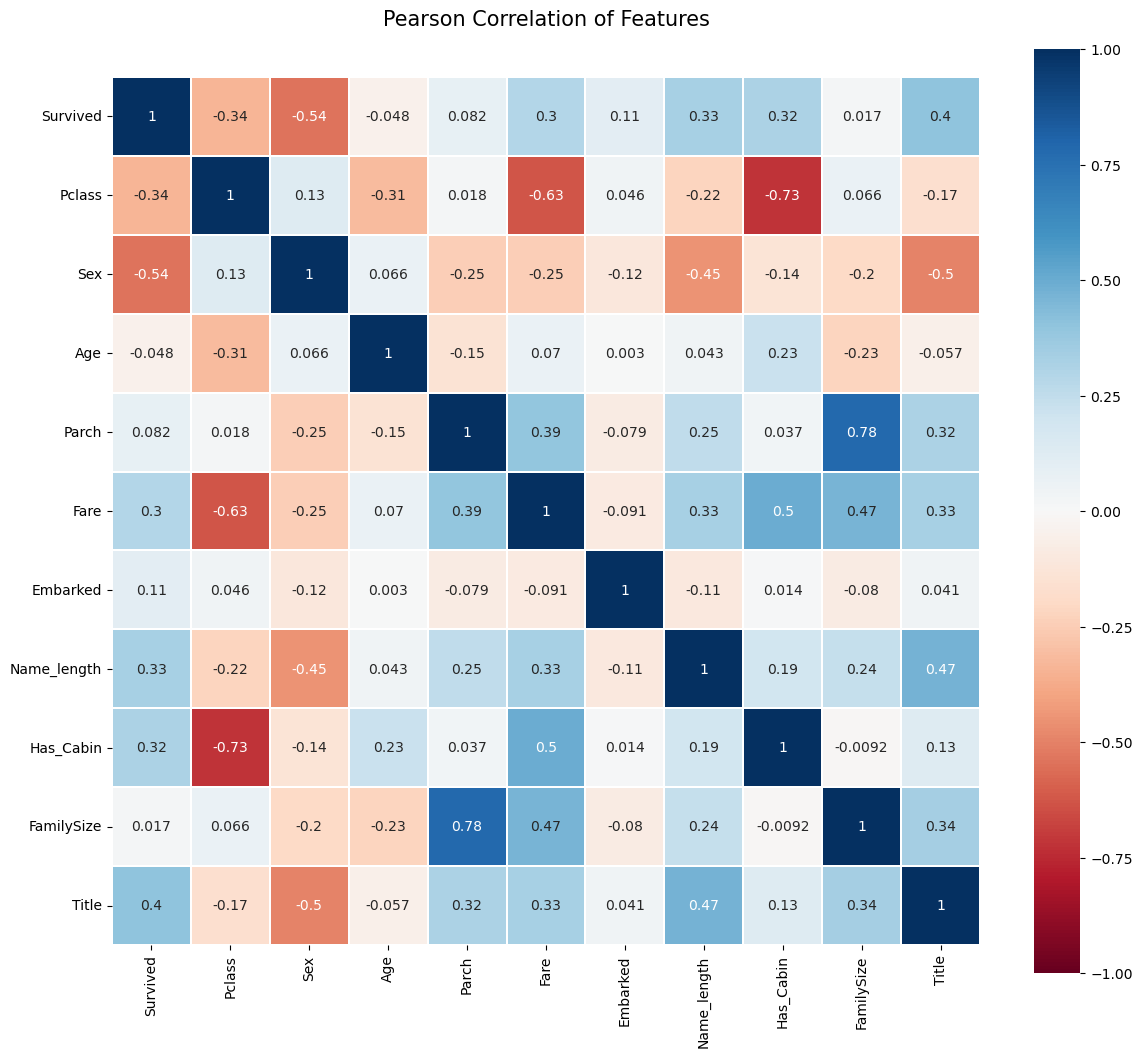

In [59]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y = 1.05, size = 15)
sns.heatmap(train.astype(float).corr(), linewidths=0.1, vmin = -1, vmax = 1.0, square = True, cmap = colormap,  annot = True)

#### Takeaway from the Plots(그래프를 통해 얻은 것)

This means that there aren't too many features strongly correlated with one another.   
플롯으로부터 얻을 수 있는 한 가지 정보는 서로 강하게 상관된 피처가 많지 않다는 것입니다.

This is good from the point of view of feeding these features into your learning model because it means that there isn't much redundant or superfluous data in our training set,
이는 학습 모델에 이러한 피처들을 입력하기에 좋은 점입니다.

and we are happy that each feature carries some unique information.
각 피처가 독특한 정보를 가지고 있다는 것을 의미합니다.

The two most correlated features are Family size and Parch (Parents and Children).
가장 상관관계가 큰 두 피처는 가족 규모와 Parch (부모 및 자녀)입니다.

I'll still leave both features in for the purposes of this exercise.
이 연습을 위해 두 피처를 모두 유지하겠습니다.

#### Pairplots(페어플롯)

Finally, let us generate some pairplots to observe the distribution of data from one feature to another.
마지막으로 페어플롯을 생성하여 피처 간의 데이터 분포를 관찰해보겠습니다.

Once again, we will use Seaborn to help us.
다시 한 번 Seaborn을 사용하겠습니다.

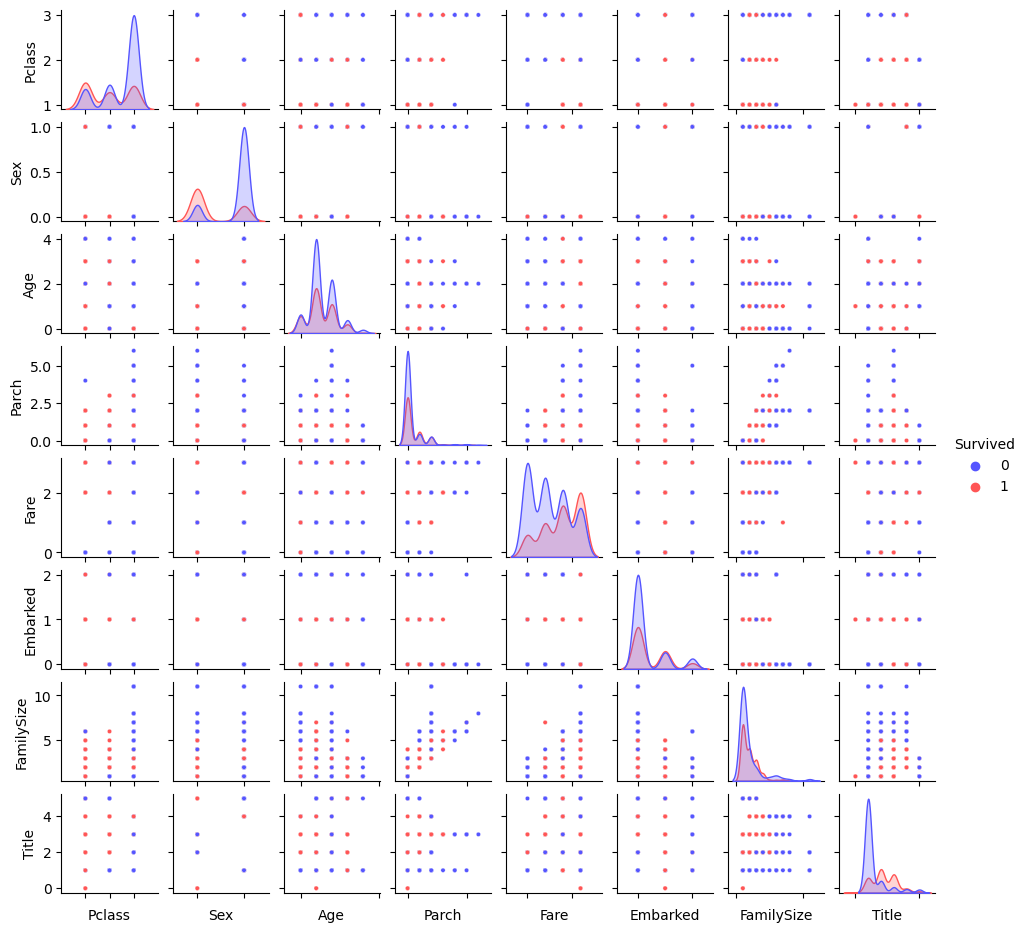

In [60]:
g = sns.pairplot(train[['Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'Title']], hue ='Survived', palette = 'seismic', size = 1.2, diag_kind = 'kde', diag_kws = dict(shade=True), plot_kws=dict(s=10))
g.set(xticklabels=[])
plt.show()

## Ensembling & Stacking models(앙상블 및 스태킹 모델)

Finally after that brief whirlwind detour with regards to feature engineering and formatting, we finally arrive at the meat and gist of this notebook.   
Feature engineering와 데이터 포맷팅과 관련하여 간략한 이야기를 한 후, 이제 드디어 이 노트북의 핵심으로 들어가보겠습니다.

Creating a Stacking ensemble!
스태킹 앙상블 생성하기!

### Helpers via Python Classes(Python 클래스를 사용한 도움 함수)

Here we invoke the use of Python's classes to help make it more convenient for us.
여기서는 Python의 클래스를 활용하여 우리에게 편리함을 제공합니다.

For any newcomers to programming, one normally hears Classes being used in conjunction with Object-Oriented Programming (OOP).
프로그래밍에 처음 입문하는 사람들에게는 일반적으로 클래스가 객체지향 프로그래밍(OOP)과 함께 사용되는 것을 듣게 됩니다.

In short, a class helps to extend some code/program for creating objects (variables for old-school peeps) as well as to implement functions and methods specific to that class.
간단히 말해, 클래스는 객체(옛날 사람들을 위한 변수)를 생성하는 데 사용되는 코드/프로그램을 확장하고, 해당 클래스에 특정 함수와 메서드를 구현하는 데 도움을 줍니다.

In the section of code below, we essentially write a class SklearnHelper that allows one to extend the inbuilt methods (such as train, predict and fit) common to all the Sklearn classifiers.
아래 코드 섹션에서는 SklearnHelper라는 클래스를 작성하는데, 이 클래스는 모든 Sklearn 분류기에 공통적으로 사용되는 train, predict 및 fit과 같은 내장 메서드를 확장할 수 있게 해줍니다.

Therefore this cuts out redundancy as won't need to write the same methods five times if we wanted to invoke five different classifiers.
따라서, 다섯 가지 다른 분류기를 호출하려면 동일한 메서드를 다섯 번 작성할 필요가 없어지므로 중복을 제거할 수 있습니다.

In [85]:
# Some useful parameters which will come in handy later on
ntrain = train.shape[0]
ntest = test.shape[0]
SEED = 0 # for reproducibility 재현을 위함
NFOLDS = 5 # set folds for out-of-fold prediction ## Out-of-Fold 예측을 위한 폴드 설정하기
kf = KFold(n_splits=NFOLDS, random_state=SEED, shuffle = True)

# Class to extend the Sklearn classifier (Sklearn 분류기를 확장할 목적의 클래스)
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)
        
    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)
    
    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self, x, y):
        return self.clf.fit(x, y)
    
    def feature_importances(self, x, y):
        feature_importance = self.clf.fit(x,y).feature_importances_
        feature_importance = list(feature_importance)
        print(feature_importance)
        return feature_importance
        
# Class to extend XGboost classifer # XGBoost 분류기를 확장하기 위한 클래스

Bear with me for those who already know this but for people who have not created classes or objects in Python before, let me explain what the code given above does.
알고 있는 분들께는 양해를 구합니다만, Python에서 클래스나 객체를 생성한 적이 없는 분들을 위해 위에서 제공된 코드가 무엇을 하는지 설명하겠습니다.

In creating my base classifiers, I will only use the models already present in the Sklearn library and therefore only extend the class for that.
기본 분류기를 생성할 때에는 Sklearn 라이브러리에 이미 존재하는 모델만 사용하고, 그에 해당하는 클래스만 확장할 것입니다.

**def init** : Python standard for invoking the default constructor for the class.
def init : 클래스의 기본 생성자를 호출하기 위한 Python 표준 구문입니다.

This means that when you want to create an object (classifier), you have to give it the parameters of clf (what sklearn classifier you want), seed (random seed), and params (parameters for the classifiers).
이는 객체(분류기)를 생성하려면 clf (원하는 Sklearn 분류기), seed (랜덤 시드) 및 params (분류기의 매개변수)를 전달해야 한다는 것을 의미합니다.

The rest of the code are simply methods of the class which simply call the corresponding methods already existing within the sklearn classifiers.
나머지 코드는 단순히 클래스의 메서드로, Sklearn 분류기 내에서 이미 존재하는 해당 메서드를 호출합니다.

Essentially, we have created a wrapper class to extend the various Sklearn classifiers so that this should help us reduce having to write the same code over and over when we implement multiple learners to our stacker.
기본적으로, 우리는 여러 Sklearn 분류기를 확장하기 위한 래퍼 클래스를 생성하여, Stacker에 여러 학습기를 구현할 때 동일한 코드를 반복 작성하지 않도록 도와줍니다.

#### Out-of-Fold Predictions(Out-of-Fold 예측)

Now, as alluded to above in the introductory section, stacking uses predictions of base classifiers as input for training a second-level model.
지금, 이전 소개 섹션에서 암시한 바와 같이, Stacking은 기본 분류기의 예측을 두 번째 수준 모델의 학습에 입력으로 사용합니다.

However, one cannot simply train the base models on the full training data, generate predictions on the full test set, and then output these for the second-level training.
그러나 기본 모델을 전체 학습 데이터로 학습하고 전체 테스트 세트에 대한 예측을 생성한 다음 이를 두 번째 수준 학습에 출력하기만 해서는 안 됩니다.

This runs the risk of your base model predictions already having "seen" the test set and therefore overfitting when feeding these predictions.
이렇게 하면 기본 모델의 예측이 이미 테스트 세트를 "본" 것으로 간주되어, 이 예측을 입력으로 사용할 때 과적합의 위험이 있습니다.

In [62]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))
    
    for i, (train_index, test_index) in enumerate(kf.split(train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]
        
        clf.train(x_tr, y_tr)
        
        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)
    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

Generating our Base First-Level Models
우리의 첫 번째 수준 모델을 생성합니다.

So now let us prepare five learning models as our first level classification.
이제 첫 번째 수준의 분류로 다섯 가지 학습 모델을 준비해보겠습니다.

These models can all be conveniently invoked via the Sklearn library and are listed as follows:
이러한 모델들은 모두 Sklearn 라이브러리를 통해 편리하게 호출할 수 있으며, 다음과 같이 나열됩니다:

1. RandomForestClassifier
2. ExtraTreesClassifier
3. AdaBoostClassifier
4. GradientBoostingClassifier
5. Support Vector Machine (SVC)

**Parameters**   
Just a quick summary of the parameters that we will be listing here for completeness,
매개변수들에 대한 간단한 요약을 아래에 제시하겠습니다.

**n_jobs** : Number of cores used for the training process. If set to -1, all cores are used.
n_jobs : 학습 프로세스에 사용되는 코어의 수입니다. -1로 설정하면 모든 코어가 사용됩니다.

**n_estimators** : Number of classification trees in your learning model (set to 10 per default)
n_estimators : 학습 모델의 분류 트리 수입니다 (기본값은 10으로 설정됩니다).

**max_depth** : Maximum depth of tree, or how much a node should be expanded. Beware if set to too high a number would run the risk of overfitting as one would be growing the tree too deep.
max_depth : 트리의 최대 깊이 또는 노드의 확장 정도를 의미합니다. 너무 높은 숫자로 설정하면 트리가 너무 깊어져 과적합의 위험이 있습니다.

**verbose** : Controls whether you want to output any text during the learning process. A value of 0 suppresses all text while a value of 3 outputs the tree learning process at every iteration.
verbose : 학습 과정 중에 텍스트를 출력할지 여부를 제어합니다. 값이 0이면 모든 텍스트가 억제되고, 값이 3이면 매 반복마다 트리 학습 과정을 출력합니다.

Please check out the full description via the official Sklearn website. There you will find that there are a whole host of other useful parameters that you can play around with.
전체 설명은 공식 Sklearn 웹사이트에서 확인해주세요. 거기에는 여러분이 실험해볼 수 있는 많은 유용한 매개변수들이 있습니다.

In [63]:
# Put in our parameters for said classifiers # 분류기에 파라미터를 입력합니다
# Random Forest parameters
rf_params = {
    'n_jobs' : -1,
    'n_estimators' : 500,
    'warm_start' : True,
    'max_depth' : 6,
    'min_samples_leaf' : 2,
    'max_features' : 'sqrt',
    'verbose' : 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs' : -1,
    'n_estimators' : 500,
    'max_depth' : 8,
    'min_samples_leaf' : 2,
    'verbose' : 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators' : 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
    'max_depth': 5,
    'min_samples_leaf' : 2,
    'verbose' : 0
}

# Support Vector Classifier parameters
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
}

Furthermore, since having mentioned about Objects and classes within the OOP framework, let us now create 5 objects that represent our 5 learning models via our Helper Sklearn Class we defined earlier.   
또한, 앞서 언급한 것처럼 OOP 프레임워크 내의 객체와 클래스에 대해 언급한 후, 이제 이전에 정의한 Helper Sklearn Class를 통해 5개의 학습 모델을 나타내는 객체를 생성해보겠습니다.

In [88]:
# Create 5 objects that represent our 4 models
rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params = et_params)
ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)
svc = SklearnHelper(clf=SVC, seed=SEED, params = svc_params)

Creating NumPy arrays out of our train and test sets
훈련 및 테스트 세트에서 NumPy 배열 생성


Great. Having prepared our first layer base models as such, we can now ready the training and test data for input into our classifiers by generating NumPy arrays out of their original dataframes as follows:

훌륭합니다. 우리가 이렇게 첫 번째 레이어의 기본 모델을 준비했으므로, 이제 원래의 데이터프레임에서 NumPy 배열을 생성하여 분류기에 입력할 준비를 할 수 있습니다. 다음과 같이 수행합니다:

In [65]:
# Create Numpy arrays of train, test and target (Survived) dataframes to feed into our models
y_train = train['Survived'].ravel()
train = train.drop(['Survived'], axis=1)
x_train = train.values # Creates an array of the train data
x_test = test.values # Creates an array of the test data

#### Output of the First level Predictions   
첫 번째 수준 예측의 출력

We now feed the training and test data into our 5 base classifiers and use the Out-of-Fold prediction function we defined earlier to generate our first level predictions. Allow a handful of minutes for the chunk of code below to run.   
우리는 이제 훈련 데이터와 테스트 데이터를 5개의 기본 분류기에 입력하고, 앞서 정의한 Out-of-Fold 예측 함수를 사용하여 첫 번째 레벨의 예측 결과를 생성합니다. 아래의 코드 청크가 실행되는 동안 몇 분 정도 소요될 수 있습니다.

In [89]:
# Create our OOF train and test predictions. These base results will be used as new fetures
# OOF(Out-of-Fold) 훈련 및 테스트 예측 생성. 이러한 기본 결과는 새로운 특성으로 사용됩니다.
et_oof_train, et_oof_test = get_oof(et, x_train, y_train, x_test) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf, x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, x_train, y_train, x_test) # AdaBoost
gb_oof_train, gb_oof_test = get_oof(gb, x_train, y_train, x_test) # Gradient Boost
svc_oof_train, svc_oof_test = get_oof(svc, x_train, y_train, x_test) # Support Vector Classifier

print('Training is complete')


Training is complete


**Feature importances generated from the different classifiers**   
다양한 분류기에서 생성된 기능 중요도

Now having learned our the first-level classifiers, we can utilise a very nifty feature of the Sklearn models and that is to output the importances of the various features in the training and test sets with one very simple line of code.

이제 첫 번째 레벨 분류기를 학습한 후, Sklearn 모델의 매우 유용한 기능을 활용할 수 있습니다. 이 기능은 매우 간단한 한 줄의 코드로 훈련 및 테스트 세트의 다양한 특성의 중요도를 출력할 수 있게 해줍니다.

According to the Sklearn documentation, most of the classifiers come with a built-in attribute called ".featureimportances" that returns the feature importances. By invoking this attribute using the function we defined earlier, we can easily plot the feature importances.

Sklearn 문서에 따르면 대부분의 분류기는 **".featureimportances"**라는 내장 속성을 가지고 있으며, 이 속성은 특성의 중요도를 반환합니다. 앞서 정의한 함수를 사용하여 이 속성을 호출하고, 이를 통해 특성의 중요도를 쉽게 시각화할 수 있습니다.

In [90]:
rf_feature = rf.feature_importances(x_train, y_train)
et_feature = et.feature_importances(x_train, y_train)
ada_feature = ada.feature_importances(x_train, y_train)
gb_feature = gb.feature_importances(x_train, y_train)

[0.10373066415082678, 0.21914676261780416, 0.03304275084884349, 0.019942156505210987, 0.047077630161985705, 0.028379074564538212, 0.12251859607155498, 0.05089943110330392, 0.07555444024078169, 0.29970849373514996]
[0.1305854269889815, 0.38998779586418814, 0.027788605820386572, 0.020282300907853695, 0.056738981934051615, 0.029432719722468508, 0.05050539148612592, 0.08100146917723099, 0.04893574495887734, 0.16474156313983568]
[0.03, 0.012, 0.018, 0.066, 0.036, 0.01, 0.686, 0.014, 0.054, 0.074]
[0.0828024224948464, 0.01294209428440511, 0.05278415394036775, 0.013987766870524974, 0.051489098630705735, 0.02291324307924954, 0.17778408265512344, 0.04453521485932507, 0.11531741712343009, 0.42544450606202194]


In [91]:
rf_feature

[0.10373066415082678,
 0.21914676261780416,
 0.03304275084884349,
 0.019942156505210987,
 0.047077630161985705,
 0.028379074564538212,
 0.12251859607155498,
 0.05089943110330392,
 0.07555444024078169,
 0.29970849373514996]

So I have not yet figured out how to assign and store the feature importances outright. Therefore I'll print out the values from the code above and then simply copy and paste into Python lists as below (sorry for the lousy hack)

따라서 나는 아직 특성 중요도를 직접 할당하고 저장하는 방법을 알아내지 못했습니다. 따라서 위의 코드에서 값을 출력한 다음 아래와 같이 Python 리스트로 복사하여 붙여넣기하겠습니다 (이 번거로운 방법으로 죄송합니다).

=> I Solved it 내가 해결했습니다

In [ ]:
# rf_features = [0.10474135,  0.21837029,  0.04432652,  0.02249159,  0.05432591,  0.02854371
#   ,0.07570305,  0.01088129 , 0.24247496,  0.13685733 , 0.06128402]
# et_features = [ 0.12165657,  0.37098307  ,0.03129623 , 0.01591611 , 0.05525811 , 0.028157
#   ,0.04589793 , 0.02030357 , 0.17289562 , 0.04853517,  0.08910063]
# ada_features = [0.028 ,   0.008  ,      0.012   ,     0.05866667,   0.032 ,       0.008
#   ,0.04666667 ,  0.     ,      0.05733333,   0.73866667,   0.01066667]
# gb_features = [ 0.06796144 , 0.03889349 , 0.07237845 , 0.02628645 , 0.11194395,  0.04778854
#   ,0.05965792 , 0.02774745,  0.07462718,  0.4593142 ,  0.01340093]

Create a dataframe from the lists containing the feature importance data for easy plotting via the Plotly package.   
Plotly 패키지를 통해 쉽게 그래프를 그릴 수 있도록 feature 중요도 데이터가 포함된 목록에서 데이터 프레임을 만듭니다.